# Lab 7&8

# Lab 7 part

In [149]:
from scipy import stats
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rc('figure', figsize=(12, 7))

infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)
infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile2)

1. Make a stacked histogram plot for the feature variable: mass

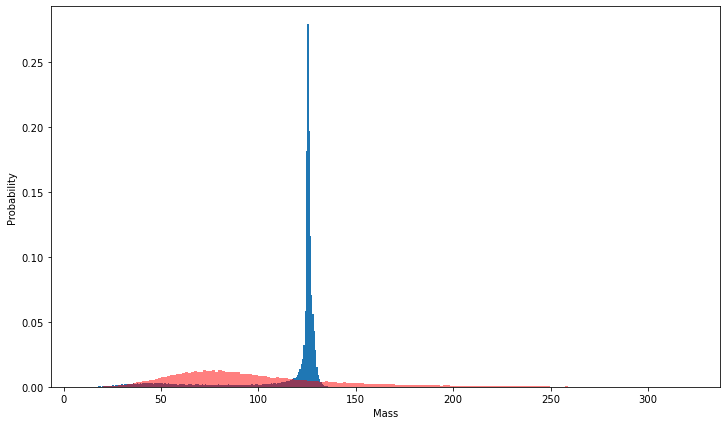

In [150]:
qcd_mass = qcd['mass']
higgs_mass = higgs['mass']
plt.hist(higgs_mass, 200, density=True, label='Higgs')
plt.hist(qcd_mass, 200, color='red', density=True, label='QCD', alpha = 0.5)
plt.xlabel('Mass')
plt.ylabel('Probability')
plt.show()

In [151]:
n_higgs = 100
n_qcd = 20000
n_tot = n_higgs + n_qcd
significance = stats.norm.isf(stats.poisson.sf(n_tot, n_qcd))
n_higgs/np.sqrt(n_qcd)

0.7071067811865475

NHiggs/sqrt(NQCD) = 0.7071067811865475

2. Identify mass cuts to optimize the expected significance.

In [152]:
def cut(higgs, qcd, feature, lower, upper, max_size, n_h=n_higgs, n_q=n_qcd):
    cut_max = 0
    cut_size = 1
    sig_max = significance   
    n_higgs_var = n_higgs    
    n_qcd_var = n_qcd        
    hf = higgs[feature]
    qf = qcd[feature]
    size_arr = np.linspace(.1, max_size, 100)

    for size in size_arr:
        cuts = np.arange(lower, upper, size)
        for i, cut in enumerate(cuts):
            higgs_cut = np.array(hf[hf>cut][hf < cut + size])
            qcd_cut = np.array(qf[qf>cut][qf < cut + size])
            ratio_higgs = len(higgs_cut)/len(higgs)
            ratio_qcd = len(qcd_cut)/len(qcd)
            adjusted_n_higgs = n_h * ratio_higgs
            adjusted_n_qcd = n_q * ratio_qcd
            adjusted_n_qcd = 1 if adjusted_n_qcd == 0 else adjusted_n_qcd
            adjusted_sig = adjusted_n_higgs/np.sqrt(adjusted_n_qcd)
            if (adjusted_sig > sig_max):
                cut_max = cut
                cut_size = size
                sig_max = adjusted_sig
                n_higgs_var = adjusted_n_higgs
                n_qcd_var = adjusted_n_qcd
    mass_cuts = np.array((cut_max, cut_max + cut_size))
    return mass_cuts, sig_max, n_higgs_var, n_qcd_var

In [153]:
mass_cut = cut(higgs, qcd, 'mass', 100, 150, 20)
print(f"The mass cut {mass_cut[0]} gives a significance of {mass_cut[1]:.2f}")

The mass cut [124.81818182 126.72727273] gives a significance of 3.29


3.29 is much higher than 0.707.

3. Make stacked histogram plots for the reset of features

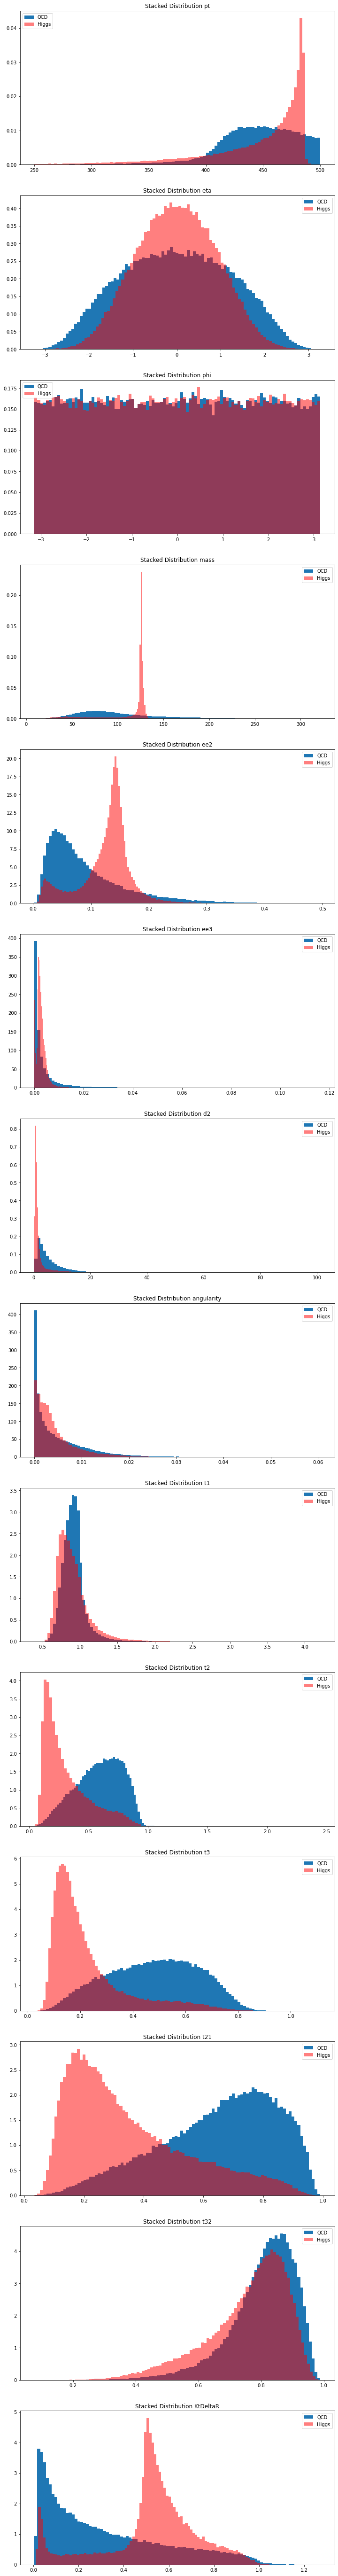

In [154]:
fig, ax = plt.subplots(higgs.shape[1], 1, figsize=(12, 100))
for idx, feature in enumerate(higgs):
    ax[idx].hist(qcd[feature], 100, density=True, label="QCD")
    ax[idx].hist(higgs[feature], 100, color='red', density=True, label="Higgs", alpha=0.5)
    ax[idx].title.set_text(f"Stacked Distribution {feature}")
    ax[idx].legend()

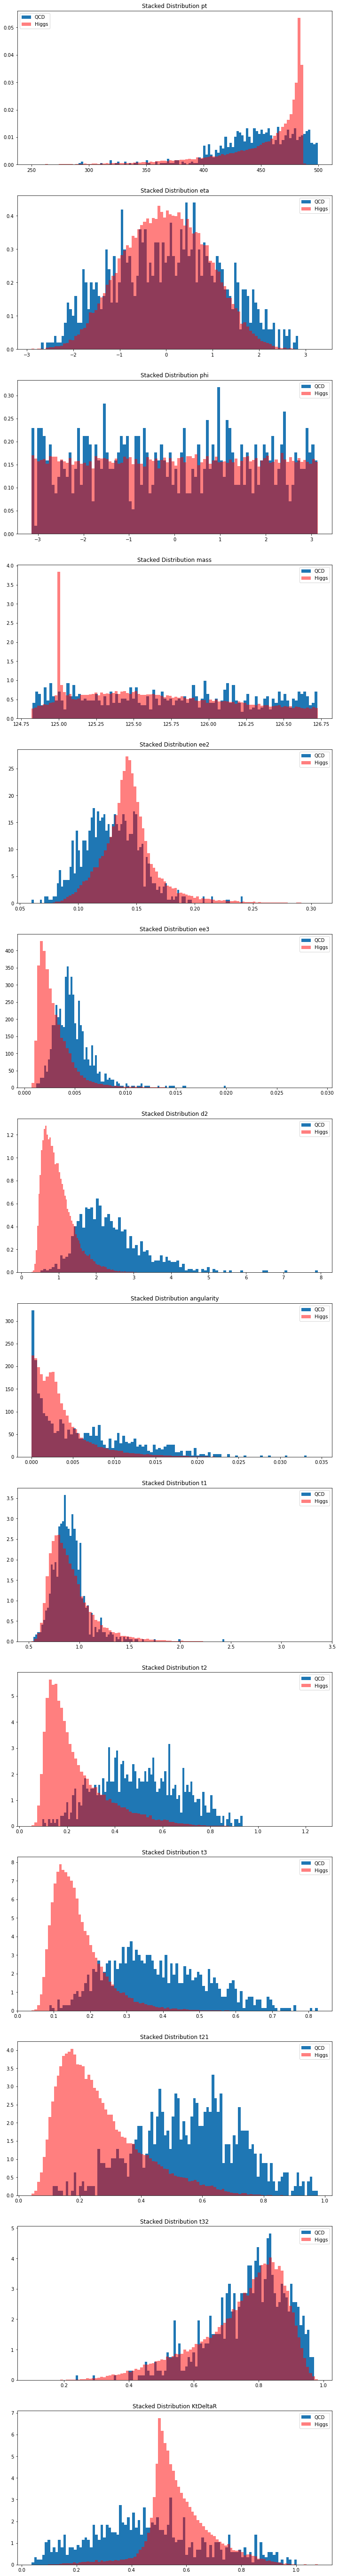

In [155]:
higgs_mass_cut = higgs[(higgs_mass>=mass_cut[0][0]) & (higgs_mass<=mass_cut[0][1])]
qcd_mass_cut = qcd[(qcd_mass>=mass_cut[0][0]) & (qcd_mass<=mass_cut[0][1])]

fig, ax = plt.subplots(higgs.shape[1], 1, figsize=(12, 100))
for idx, feature in enumerate(higgs):
    ax[idx].hist(qcd_mass_cut[feature], 100, density=True, label="QCD")
    ax[idx].hist(higgs_mass_cut[feature], 100, color='red', density=True, label="Higgs", alpha=0.5)
    ax[idx].title.set_text(f"Stacked Distribution {feature}")
    ax[idx].legend()

d2 is a good descriminating feature, we can use that for the best significance calculating.

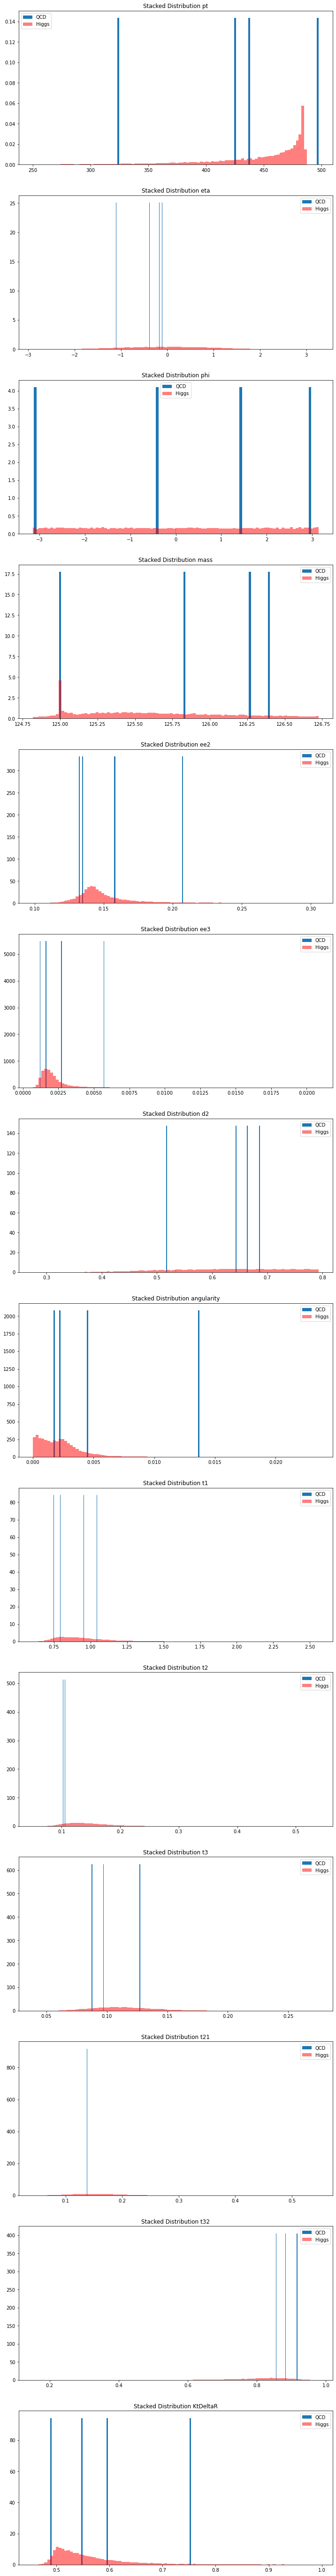

In [156]:
d2_cut = cut(higgs_mass_cut, qcd_mass_cut, 'd2', 0, 5, 5, mass_cut[2], mass_cut[3])
higgs_d2 = higgs_mass_cut['d2']
qcd_d2 = qcd_mass_cut['d2']
higgs_d2_cut = higgs_mass_cut[(higgs_d2>=d2_cut[0][0]) & (higgs_d2<=d2_cut[0][1])]
qcd_d2_cut = qcd_mass_cut[(qcd_d2>=d2_cut[0][0]) & (qcd_d2<=d2_cut[0][1])]

fig, ax = plt.subplots(higgs.shape[1], 1, figsize=(12, 100))
for idx, feature in enumerate(higgs):
    ax[idx].hist(qcd_d2_cut[feature], 100, density=True, label="QCD")
    ax[idx].hist(higgs_d2_cut[feature], 100, color='red', density=True, label="Higgs", alpha=0.5)
    ax[idx].title.set_text(f"Stacked Distribution {feature}")
    ax[idx].legend()

In [158]:
n_higgs_d2 = np.round(d2_cut[2])  
n_qcd_d2 = np.round(d2_cut[3])    
n_tot_d2 = n_higgs_d2 + n_qcd_d2
sig = stats.norm.isf(stats.poisson.sf(n_tot_d2, n_qcd_d2))
print(f'Poisson statistics gives a significance of {sig:.2f}')
print(f"The d2 cut {d2_cut[0]} gives a significance of {d2_cut[1]:.2f}")

Poisson statistics gives a significance of 8.63
The d2 cut [0.         0.79292929] gives a significance of 19.40


So cutting the data by mass first, then by d2 is good enough to use.

# Lab 8 part

In [159]:
highlum = pd.read_hdf('data_highLumi_pt_250_500.h5')
lowlum = pd.read_hdf('data_lowLumi_pt_250_500.h5')

1. High luminosity data

In [160]:
mass_highLumi = highlum['mass']
d2_highLumi = highlum['d2']
mass_lowLumi = lowlum['mass']
d2_lowLumi = lowlum['d2']

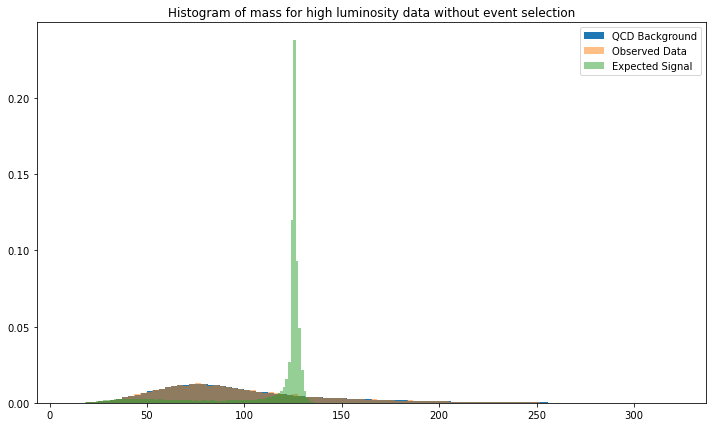

In [176]:
plt.title('Histogram of mass for high luminosity data without event selection')
plt.hist(qcd_mass,100,label = 'QCD Background',density = 'true')
plt.hist(mass_highLumi, 100, label = 'Observed Data',density = 'true', alpha = 0.5)
plt.hist(higgs['mass'], 100, density = 'true', label = 'Expected Signal', alpha = 0.5)
plt.legend()

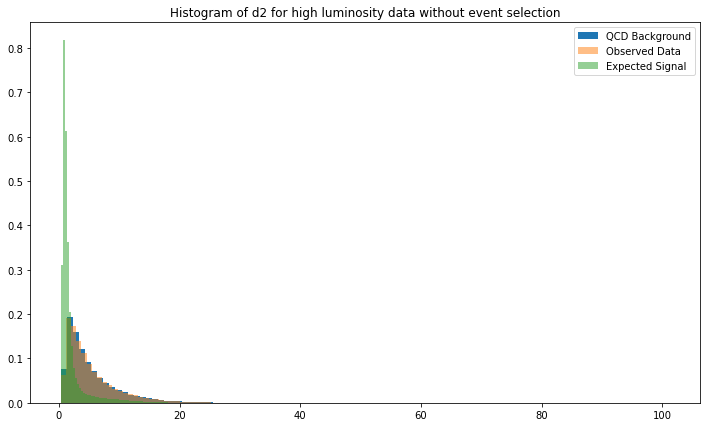

In [184]:
plt.title('Histogram of d2 for high luminosity data without event selection')
plt.hist(qcd['d2'],100,label = 'QCD Background', density = 'true')
plt.hist(d2_highLumi,100, label = 'Observed Data',density = 'true', alpha = 0.5)
plt.hist(higgs['d2'], 100, density = 'true', label = 'Expected Signal', alpha = 0.5)
plt.legend()

In [163]:
masscut_highLumi_boolean = (highlum['mass'] > 124) & (highlum['mass']<129)
masscut_highLumi_sel = highlum[masscut_highLumi_boolean]
mass_highLumi_sel = masscut_highLumi_sel['mass']
d2_withmasscut = masscut_highLumi_sel['d2']
d2_highLumi_sel= d2_withmasscut[d2_withmasscut < 1.2]

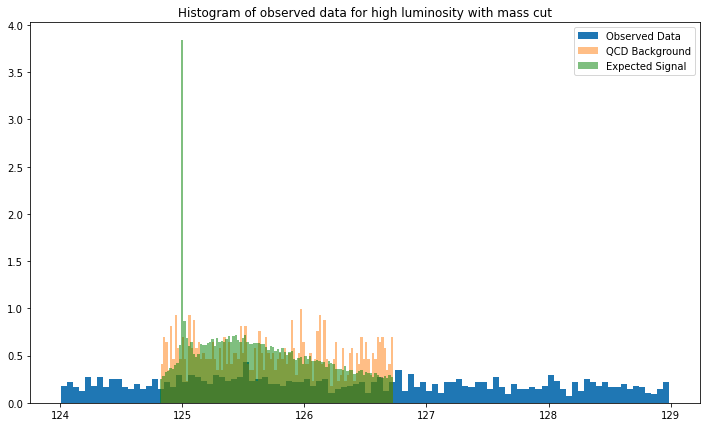

In [178]:
plt.title('Histogram of observed data for high luminosity with mass cut')
plt.hist(mass_highLumi_sel,100,density = 'ture',label = 'Observed Data')
plt.hist(qcd_mass_cut['mass'], 100,density = 'ture', label = 'QCD Background', alpha = 0.5)
plt.hist(higgs_mass_cut['mass'], 100,density = 'ture',color = 'g', label = 'Expected Signal', alpha = 0.5)
plt.legend()

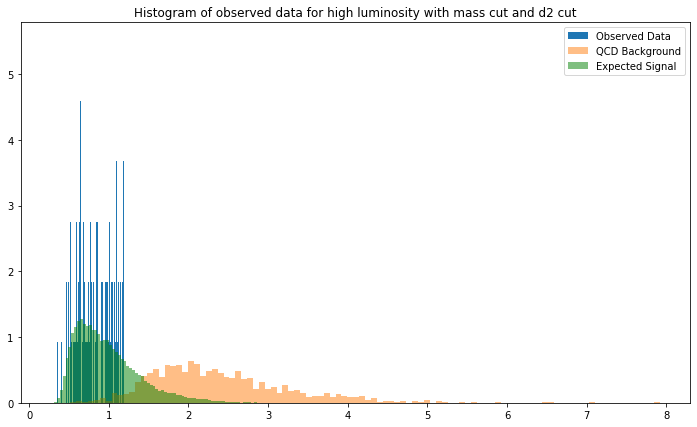

In [179]:
plt.title('Histogram of observed data for high luminosity with mass cut and d2 cut')
plt.hist(d2_highLumi_sel,100, density = 'true',label = 'Observed Data')
plt.hist(qcd_d2,100,density = 'true',label = 'QCD Background', alpha = 0.5)
plt.hist(higgs_d2,100,density = 'true',color = 'g',label = 'Expected Signal', alpha = 0.5)
plt.legend()

In [182]:
r = len(highlum['mass'])/100000
qcd_mu = 20000*r*(len(qcd_d2[qcd_d2 < 1.2])/100000)
signal_highlu_observed = len(d2_highLumi_sel)
print('the # of qcd background that in the selection range is ',qcd_mu)
print('the # of observed jets features that in the selection range is ',signal_highlu_observed)
p_higgs = stats.poisson.cdf(signal_highlu_observed + qcd_mu, qcd_mu)
sigma_higgs = stats.norm.ppf(p_higgs)
print('The significance for high luminosity data is ',sigma_higgs)

the # of qcd background that in the selection range is  2.985456
the # of observed jets features that in the selection range is  130
The significance for high luminosity data is  inf


2. Low luminosity data

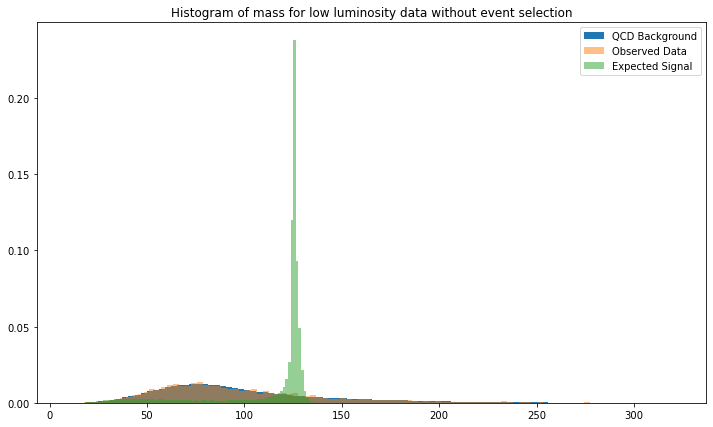

In [183]:
plt.title('Histogram of mass for low luminosity data without event selection')
plt.hist(qcd_mass,100,label = 'QCD Background',density = 'true')
plt.hist(mass_lowLumi, 100, label = 'Observed Data',density = 'true', alpha = 0.5)
plt.hist(higgs['mass'], 100, density = 'true', label = 'Expected Signal', alpha = 0.5)
plt.legend()

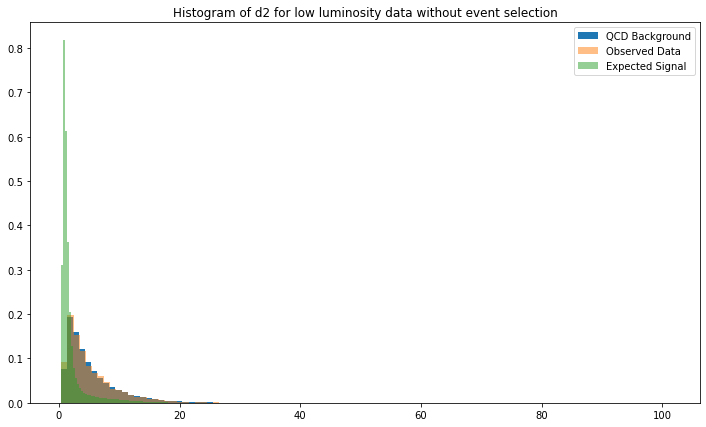

In [188]:
plt.title('Histogram of d2 for low luminosity data without event selection')
plt.hist(qcd['d2'],100,label = 'QCD Background', density = 'true')
plt.hist(d2_lowLumi,100, label = 'Observed Data',density = 'true', alpha = 0.5)
plt.hist(higgs['d2'], 100, density = 'true', label = 'Expected Signal', alpha = 0.5)
plt.legend()

In [185]:
masscut_lowLumi_boolean = (lowlum['mass'] > 124) & (lowlum['mass']<129)
masscut_lowLumi_sel = lowlum[masscut_lowLumi_boolean]
mass_lowLumi_sel = masscut_lowLumi_sel['mass']
d2_withmasscut2 = masscut_lowLumi_sel['d2']
d2_lowLumi_sel= d2_withmasscut2[d2_withmasscut2 < 1.2]

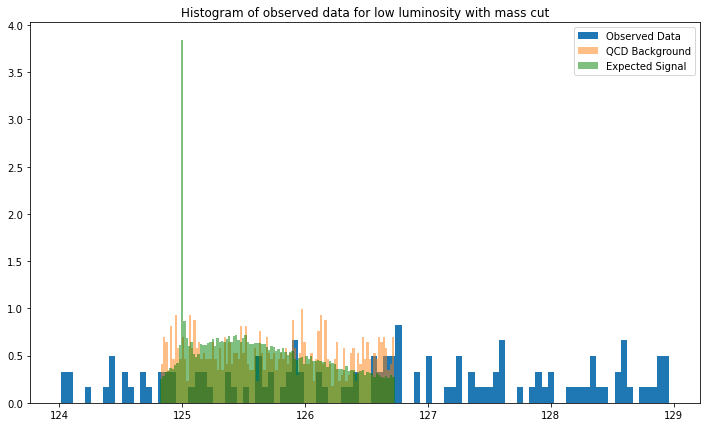

In [186]:
plt.title('Histogram of observed data for low luminosity with mass cut')
plt.hist(mass_lowLumi_sel,100,density = 'ture',label = 'Observed Data')
plt.hist(qcd_mass_cut['mass'], 100,density = 'ture', label = 'QCD Background', alpha = 0.5)
plt.hist(higgs_mass_cut['mass'], 100,density = 'ture',color = 'g', label = 'Expected Signal', alpha = 0.5)
plt.legend()

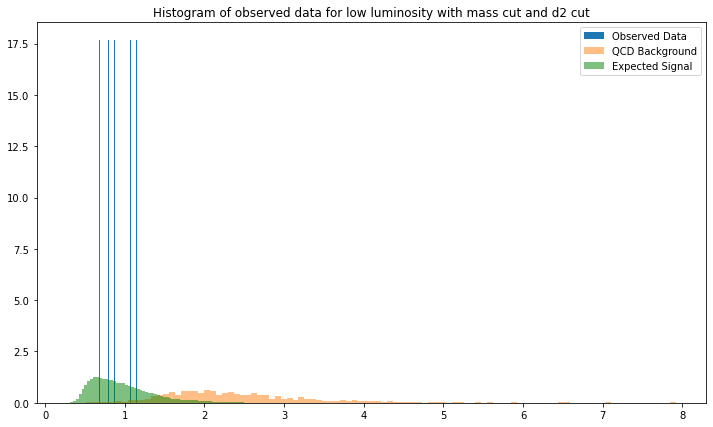

In [187]:
plt.title('Histogram of observed data for low luminosity with mass cut and d2 cut')
plt.hist(d2_lowLumi_sel,100, density = 'true',label = 'Observed Data')
plt.hist(qcd_d2,100,density = 'true',label = 'QCD Background', alpha = 0.5)
plt.hist(higgs_d2,100,density = 'true',color = 'g',label = 'Expected Signal', alpha = 0.5)
plt.legend()

In [194]:
qcd_mu = 20000*r*(len(qcd_d2[qcd_d2<1.2])/100000)
signal_lowlu_observed = len(d2_lowLumi_sel)
print('the average of qcd background that in the selection range is ',qcd_mu)
print('the numbers of observed jets features that in the selection range is ',signal_lowlu_observed)

p_higgs = stats.poisson.cdf(signal_lowlu_observed + qcd_mu, qcd_mu)
sigma_higgs = stats.norm.ppf(p_higgs)
print('The significance for low luminosity data is ',sigma_higgs)

the average of qcd background that in the selection range is  2.985456
the numbers of observed jets features that in the selection range is  10
The significance for low luminosity data is  4.168017995510286


3. 95% Confidence Level of signal yields

In [195]:
signal_expected = 100*r*(len(higgs_d2[higgs_d2<1.2])/100000)
p_upperbound_exp = stats.poisson.ppf(0.95, signal_expected)
p_upperbound_obs = stats.poisson.ppf(0.95, signal_lowlu_observed)
print('the expected signal strength is ', signal_expected)
print('the expected 95% confidence level upper limit is ', p_upperbound_exp)
print('the observed 95% confidence level upper limit is ',p_upperbound_obs)

the expected signal strength is  13.48538544
the expected 95% confidence level upper limit is  20.0
the observed 95% confidence level upper limit is  15.0


4. Evalute the 1 σ  uncertainty of the expected 95% confidence level upper limit.

In [196]:
p_low = stats.norm.cdf(-1)
p_up = stats.norm.cdf(1)
lowerthreshold = stats.poisson.ppf(p_low, p_upperbound_exp)
upperthreshold = stats.poisson.ppf(p_up, p_upperbound_exp) 
print(lowerthreshold, upperthreshold)

16.0 24.0


1 sigma uncertainty range is 20 ± 4.